In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from sklearn.metrics import accuracy_score 
df_weather= pd.read_csv("C:/Users/Thizz/Downloads/pr/spam_or_not_spam.csv")
df_weather

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [21]:
df_weather=df_weather.fillna(" ")
df_weather.isnull().sum()


email    0
label    0
dtype: int64

In [22]:
X=df_weather['email']
y=df_weather['label']


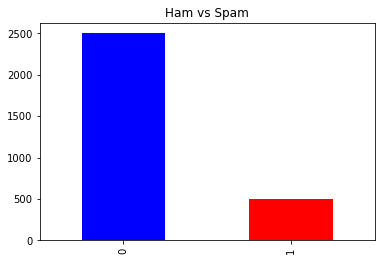

In [23]:
count_emails=pd.value_counts(y, sort= True)
count_emails.plot(kind= 'bar', color= ["blue", "red"])
plt.title('Ham vs Spam')
plt.show()

In [10]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
X  = X.apply(nltk.word_tokenize)

In [25]:
stemmer = PorterStemmer()
X = X.apply(lambda x: [stemmer.stem(y) for y in x])

In [26]:
X  = X.apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(X)

In [27]:
transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(counts,y, test_size=0.1,random_state=75)

In [29]:

model = MultinomialNB().fit(X_train, y_train)

In [30]:
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8933333333333333


In [ ]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score (y_test,y_pred )